In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pywt
import random
import timeit
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Using TensorFlow backend.


In [2]:
random.seed(1)
dataset = sio.loadmat('dataset.mat')
heart_rate = dataset['heart_rate']
signal = dataset['signal']

In [3]:
def statistics(signal):
    avg = np.mean(signal)
    sd = np.std(signal)
    maxm = max(signal)
    minm = min(signal)
    return avg, sd, maxm, minm

In [4]:
# extract feature
def extractfeature(signal, heart_rate):
    a = len(heart_rate)
    b = np.linspace(0, a-1, a, dtype=int)
    random.shuffle(b)
    b.astype('int')
    features = np.zeros((a, 48))
    heart = np.zeros((a, 1))
    for j in range(0, a):
        i = b[j]
        signal11 = signal[i, 0: 1000]
        signal12 = (signal11[1:-1] + signal11[2:])/ 2. - (signal11[1:-1] + signal11[:-2])/ 2.
        signal13 = signal11[2:] - 2*signal11[1:-1] + signal11[:-2]
        _, signal16, signal15, signal14 = pywt.wavedec(signal11, 'Haar', level=3)
        signal21 = signal[i, 1000: 2000]
        signal22 = (signal21[1:-1] + signal21[2:])/ 2. - (signal21[1:-1] + signal21[:-2])/ 2.
        signal23 = signal21[2:] - 2*signal21[1:-1] + signal21[:-2]
        _, signal26, signal25, signal24 = pywt.wavedec(signal21, 'Haar', level=3)
        features[j, 0:4] = statistics(signal11)
        features[j, 4:8] = statistics(signal12)
        features[j, 8:12] = statistics(signal13)
        features[j, 12:16] = statistics(signal14)
        features[j, 16:20] = statistics(signal15)
        features[j, 20:24] = statistics(signal16)
        features[j, 24:28] = statistics(signal21)
        features[j, 28:32] = statistics(signal22)
        features[j, 32:36] = statistics(signal23)
        features[j, 36:40] = statistics(signal24)
        features[j, 40:44] = statistics(signal25)
        features[j, 44:48] = statistics(signal26)
        heart[j] = heart_rate[i]
    return features, heart

In [5]:
X, Y  = extractfeature(signal, heart_rate)
Y = Y[:, 0]
Y = Y / 200
Y = 1 / (1 + np.exp(-Y))
X_train, Y_train = X[:2400, :], Y[:2400]
X_test, Y_test = X[2400:, :], Y[2400:]

In [6]:
# Making the neural network
start = timeit.default_timer()
model = Sequential()
model.add(Dense(input_shape = (X.shape[1],), units = 1, activation = 'sigmoid'))
#model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = "adam", loss = "mse", metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 1200, epochs = 200)
stop = timeit.default_timer()
print(stop - start) 

Epoch 1/200
2400/2400 [==============================] - 0s 182us/step - loss: 0.3614 - acc: 0.0000e+00
Epoch 2/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.3549 - acc: 0.0000e+00
Epoch 3/200
2400/2400 [==============================] - 0s 3us/step - loss: 0.3472 - acc: 0.0000e+00
Epoch 4/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.3369 - acc: 0.0000e+00
Epoch 5/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.3256 - acc: 0.0000e+00
Epoch 6/200
2400/2400 [==============================] - 0s 3us/step - loss: 0.3147 - acc: 0.0000e+00
Epoch 7/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.3030 - acc: 0.0000e+00
Epoch 8/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.2932 - acc: 0.0000e+00
Epoch 9/200
2400/2400 [==============================] - 0s 3us/step - loss: 0.2796 - acc: 0.0000e+00
Epoch 10/200
2400/2400 [==============================] - 0s 2us/step - loss: 0.

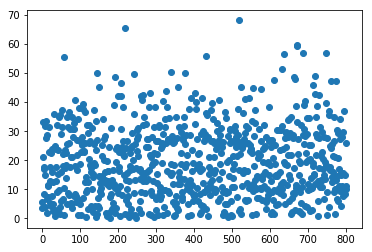

The avarage predict error:  19.2221880134
The mean squared error: 522.174717132


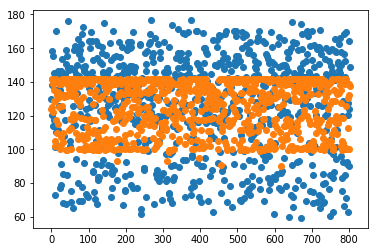

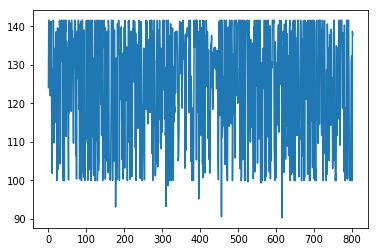

In [7]:
# Predicting results
Y_pred = model.predict(X_test, batch_size = 10)
Y_pred = Y_pred[:, 0]
Y_pred = 0 - np.log((1 / Y_pred) - 1)
Y_pred = Y_pred * 200
Y_test = 0 - np.log((1 / Y_test) - 1)
Y_test = Y_test * 200
Y_error = abs(Y_pred - Y_test)
X = np.linspace(0, 802, 803)
plt.scatter(X, Y_error)
plt.show()
print('The avarage predict error: ', np.mean(Y_error))
print ('The mean squared error:', metrics.mean_squared_error(Y_test, Y_pred))
plt.scatter(X, Y_test)
plt.scatter(X, Y_pred)
plt.show()
plt.plot(X, Y_pred)
plt.show()